# [作業目標]
- 請同學試著使用 pandas.corr() 這個函數來顯示相關係數並加以觀察結果 
- 思考1 : 使用 pandas 有沒有什麼寫法, 可以顯示欄位中最大的幾筆, 以及最小幾筆呢? (Hint: 排序後列出前幾筆/後幾筆)
- 思考2 : 試著使用散佈圖, 顯示相關度最大/最小的特徵與目標值的關係, 如果圖形不明顯, 是否有調整的方法?

# [作業重點]
- 綜合前幾單元的作法, 試試看是否能夠用繪圖顯示出特徵與目標的相關性

In [1]:
# 載入需要的套件

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# 讀取資料檔

app_train = pd.read_csv("C:/Users/YUYA/Desktop/MLmarathon/HW/application_train.csv")
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

### 相關係數
一樣，pandas 很貼心地讓我們可以非常容易計算相關係數

In [5]:
# 觀察相關係數
correlation = app_train.corr()['TARGET']
correlation

SK_ID_CURR                    -0.002108
TARGET                         1.000000
NAME_CONTRACT_TYPE            -0.030896
FLAG_OWN_CAR                  -0.021851
FLAG_OWN_REALTY               -0.006148
CNT_CHILDREN                   0.019187
AMT_INCOME_TOTAL              -0.003982
AMT_CREDIT                    -0.030369
AMT_ANNUITY                   -0.012817
AMT_GOODS_PRICE               -0.039645
REGION_POPULATION_RELATIVE    -0.037227
DAYS_BIRTH                    -0.078239
DAYS_EMPLOYED                  0.074958
DAYS_REGISTRATION              0.041975
DAYS_ID_PUBLISH                0.051457
OWN_CAR_AGE                    0.037612
FLAG_MOBIL                     0.000534
FLAG_EMP_PHONE                 0.045982
FLAG_WORK_PHONE                0.028524
FLAG_CONT_MOBILE               0.000370
FLAG_PHONE                    -0.023806
FLAG_EMAIL                    -0.001758
CNT_FAM_MEMBERS                0.009308
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893


## 練習時間
列出目標 (TARGET) 與所有欄位之間相關係數，數值最大以及最小各 15 個

通過相關係數的結果觀察有興趣的欄位與 TARGET 或其他欄位的相關係數，並嘗試找出有趣的訊息
- 最好的方式當然是畫圖，舉例來說，我們知道  EXT_SOURCE_3 這個欄位和 TARGET 之間的相關係數是 -0.178919 (在已經這個資料集已經是最負的了！)，那我們可以 EXT_SOURCE_3  為 x 軸， TARGET 為 y 軸，把資料給畫出來

In [6]:
min_column =  correlation.sort_values()[0:15]
max_column =  correlation.sort_values()[-14:-1]

In [7]:
# max
print(max_column)
min_column.index

DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.074958
Name: TARGET, dtype: float64


Index(['EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'DAYS_BIRTH',
       'DAYS_EMPLOYED_ANOM', 'FLOORSMAX_AVG', 'FLOORSMAX_MEDI',
       'FLOORSMAX_MODE', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'ELEVATORS_AVG', 'ELEVATORS_MEDI', 'FLOORSMIN_AVG', 'FLOORSMIN_MEDI',
       'LIVINGAREA_AVG'],
      dtype='object')

In [8]:
# min
print(min_column)

EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_BIRTH                   -0.078239
DAYS_EMPLOYED_ANOM           -0.045987
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
ELEVATORS_MEDI               -0.033863
FLOORSMIN_AVG                -0.033614
FLOORSMIN_MEDI               -0.033394
LIVINGAREA_AVG               -0.032997
Name: TARGET, dtype: float64


In [9]:
min_df = app_train[min_column.index]
 
min_df1 = min_df.drop(['DAYS_EMPLOYED_ANOM'], axis=1)
min_df1['TARGET'] =app_train['TARGET']
min_df2 = min_df1.fillna(min_df1.mean())
min_df2.head()

,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,DAYS_BIRTH,FLOORSMAX_AVG,FLOORSMAX_MEDI,FLOORSMAX_MODE,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,ELEVATORS_AVG,ELEVATORS_MEDI,FLOORSMIN_AVG,FLOORSMIN_MEDI,LIVINGAREA_AVG,TARGET
0,0.139376,0.262949,0.083037,9461,0.083300,0.083300,0.083300,351000.0,0.018801,0.000000,0.000000,0.125000,0.125000,0.019000,1
1,0.510853,0.622246,0.311267,16765,0.291700,0.291700,0.291700,1129500.0,0.003541,0.080000,0.080000,0.333300,0.333300,0.054900,0
2,0.729567,0.555912,0.502130,19046,0.226282,0.225897,0.222315,135000.0,0.010032,0.078942,0.078078,0.231894,0.231625,0.107399,0
3,0.510853,0.650442,0.502130,19005,0.226282,0.225897,0.222315,297000.0,0.008019,0.078942,0.078078,0.231894,0.231625,0.107399,0
4,0.510853,0.322738,0.502130,19932,0.226282,0.225897,0.222315,513000.0,0.028663,0.078942,0.078078,0.231894,0.231625,0.107399,0


In [10]:
max_df = app_train[max_column.index]
max_df['TARGET'] =app_train['TARGET']
max_df1 = max_df.fillna(max_df.mean())
max_df1.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,DEF_30_CNT_SOCIAL_CIRCLE,LIVE_CITY_NOT_WORK_CITY,OWN_CAR_AGE,DAYS_REGISTRATION,FLAG_DOCUMENT_3,REG_CITY_NOT_LIVE_CITY,FLAG_EMP_PHONE,REG_CITY_NOT_WORK_CITY,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,DAYS_EMPLOYED,TARGET
0,2.0,0,12.061091,-3648.0,1,0,1,0,-2120,-1134.0,2,2,-637.0,1
1,0.0,0,12.061091,-1186.0,1,0,1,0,-291,-828.0,1,1,-1188.0,0
2,0.0,0,26.000000,-4260.0,0,0,1,0,-2531,-815.0,2,2,-225.0,0
3,0.0,0,12.061091,-9833.0,1,0,1,0,-2437,-617.0,2,2,-3039.0,0
4,0.0,1,12.061091,-4311.0,0,0,1,1,-3458,-1106.0,2,2,-3038.0,0


In [11]:
min_df2.columns

Index(['EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'DAYS_BIRTH',
       'FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'ELEVATORS_AVG', 'ELEVATORS_MEDI',
       'FLOORSMIN_AVG', 'FLOORSMIN_MEDI', 'LIVINGAREA_AVG', 'TARGET'],
      dtype='object')

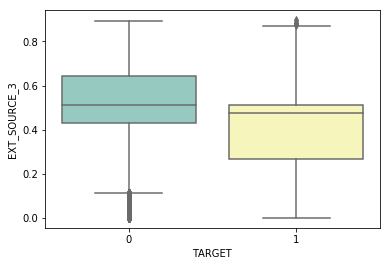

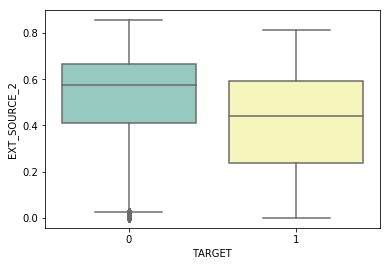

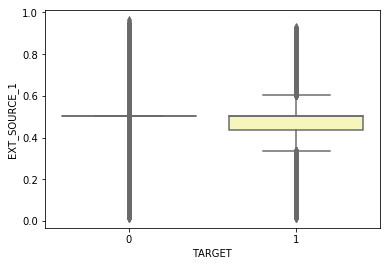

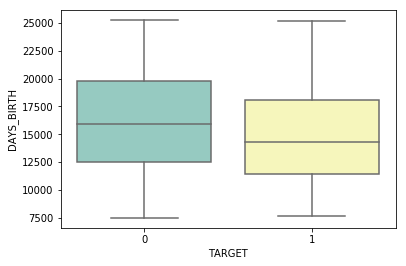

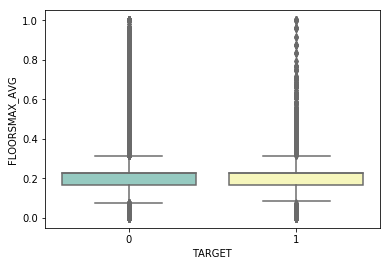

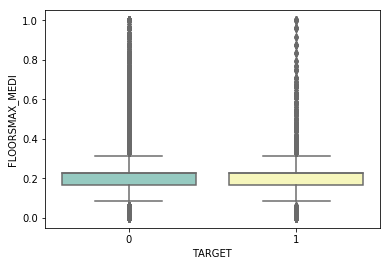

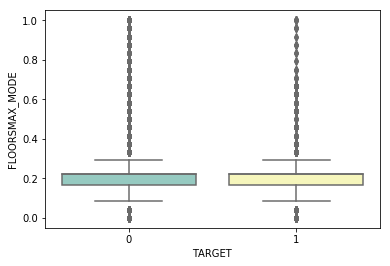

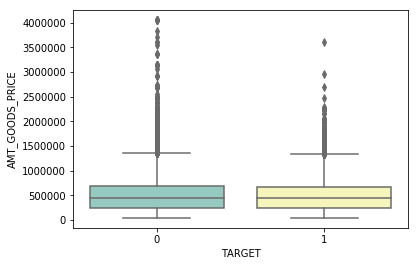

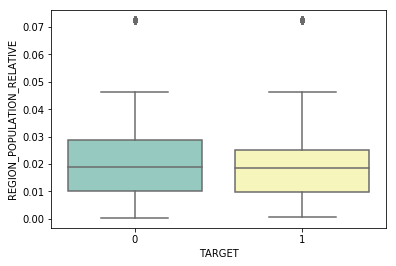

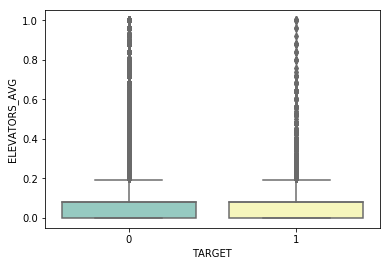

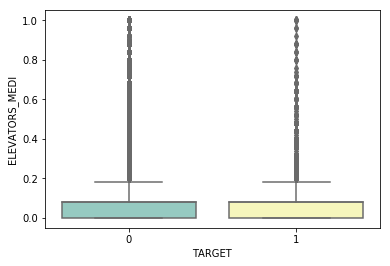

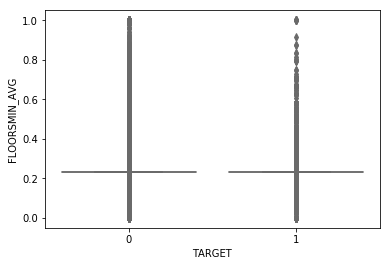

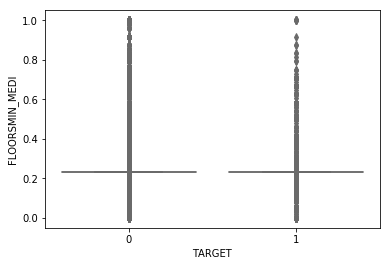

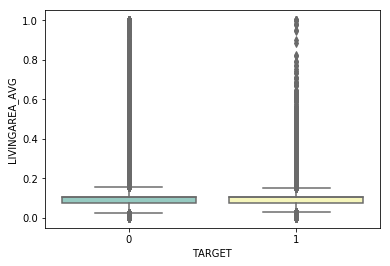

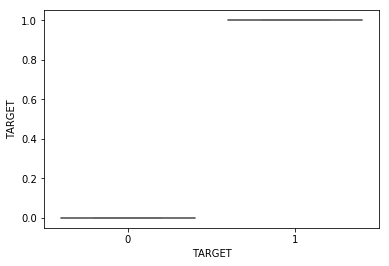

In [12]:
for col in min_df2:
    sns.boxplot(x="TARGET", y= min_df2[col],data=min_df2, palette="Set3")
    plt.show()

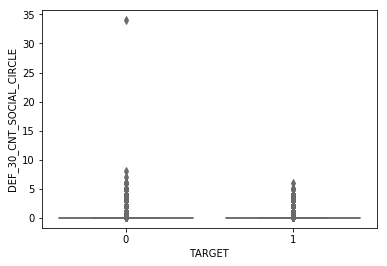

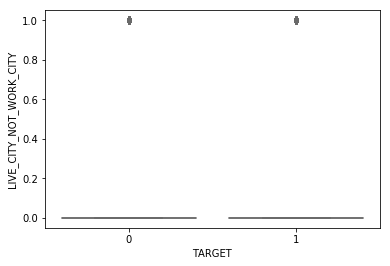

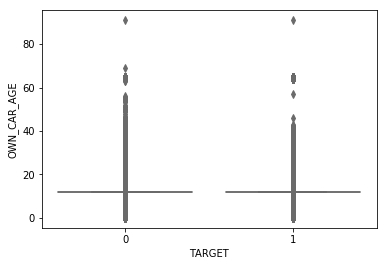

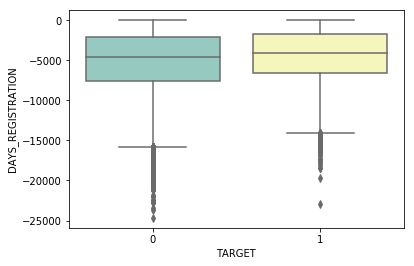

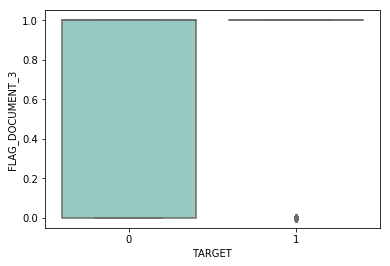

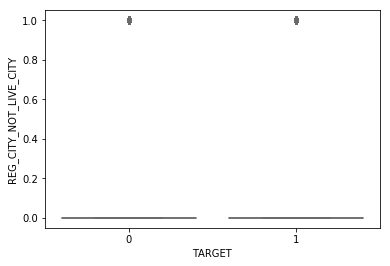

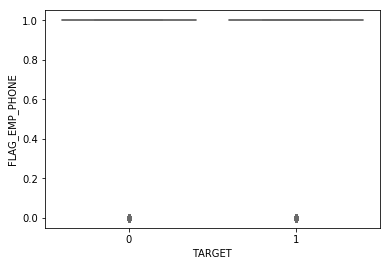

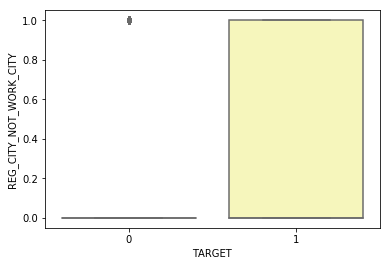

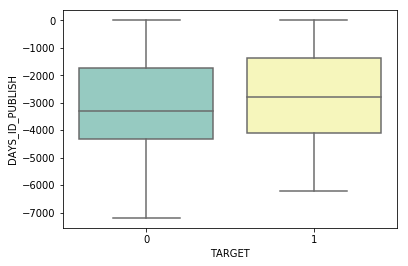

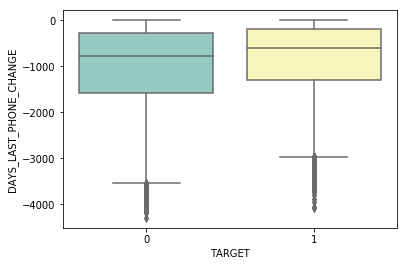

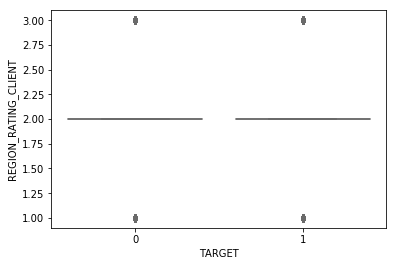

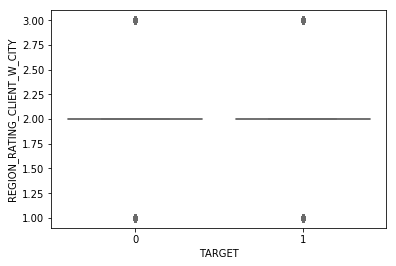

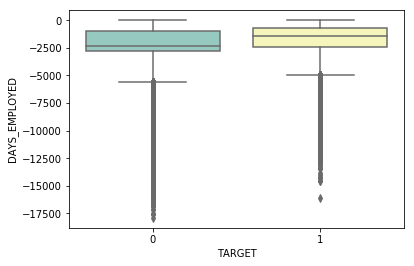

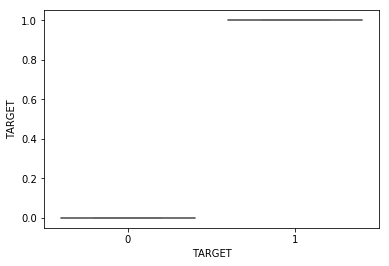

In [13]:
for col in max_df1:
    sns.boxplot(x="TARGET", y= max_df1[col],data=max_df1, palette="Set3")
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


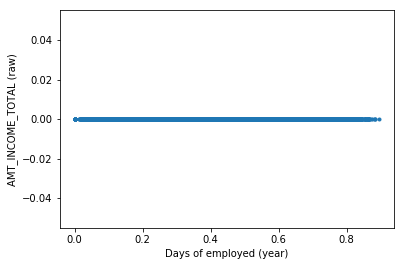

Correlation: nan


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2320: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


In [14]:
# 如果直接畫散布圖 - 看不出任何趨勢或形態
plt.plot(app_train['EXT_SOURCE_3'] , np.log10(app_train['TARGET']), '.')
plt.xlabel('Days of employed (year)')
plt.ylabel('AMT_INCOME_TOTAL (raw)')
plt.show()
corr = np.corrcoef(app_train['EXT_SOURCE_3'], np.log10(app_train['TARGET']))
print("Correlation: %.4f" % (corr[0][1]))

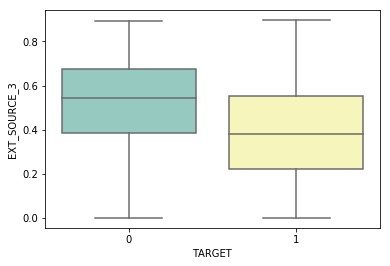

In [15]:
sns.boxplot(x="TARGET", y= "EXT_SOURCE_3",data=app_train, palette="Set3")